In [1]:
"Hello, My name is Omkar Pawar"

'Hello, My name is Omkar Pawar'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [291]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


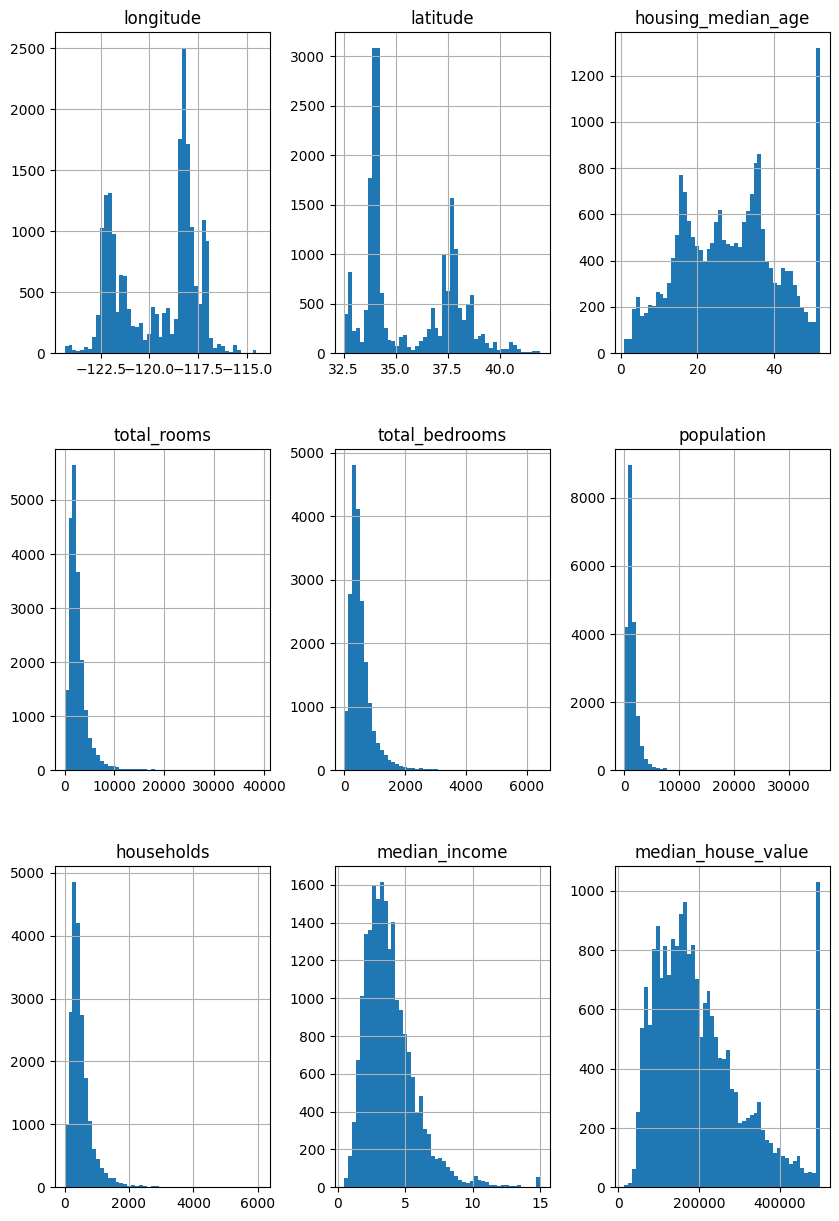

In [6]:
df.hist(figsize=(10,15),bins=50)
plt.show()

In [240]:
#df['Income_cat']=pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])
#df['income_cat']=pd.cut(df['median_income'],bins=[0.,1.5,3,4,6,np.inf],labels=[1,2,3,4,5])

In [4]:
df["income_cat"] = pd.cut(df["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])


In [8]:
df['income_cat'].head().to_frame()

,income_cat
0,5
1,5
2,5
3,4
4,3


<Axes: >

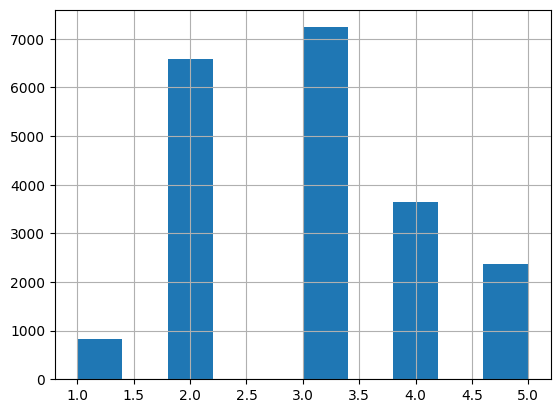

In [9]:
df['income_cat'].hist()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for index_train, index_test in split.split(df,df['income_cat']):
    s_train_set=df.loc[index_train]
    s_test_set=df.loc[index_test]

In [11]:
s_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [246]:
#s_test_set['Income_cat'].value_counts()/len(s_test_set)

In [247]:
df['income_cat'].value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [6]:
for i in (s_train_set,s_test_set):
    i.drop('income_cat',axis=1,inplace=True)

In [7]:
s_test_set.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN


In [8]:
train_copy=s_train_set.copy()

In [9]:
train_copy.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND


<Axes: xlabel='longitude', ylabel='latitude'>

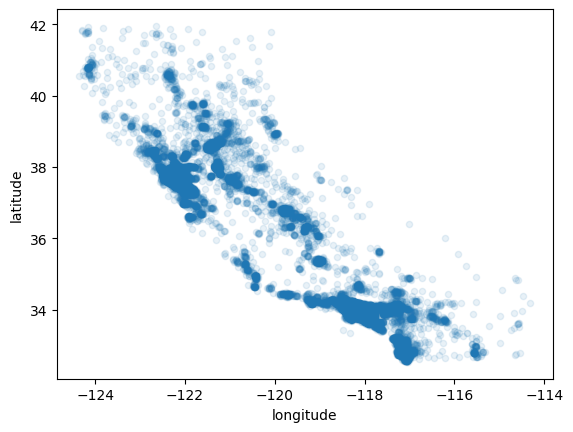

In [10]:
train_copy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

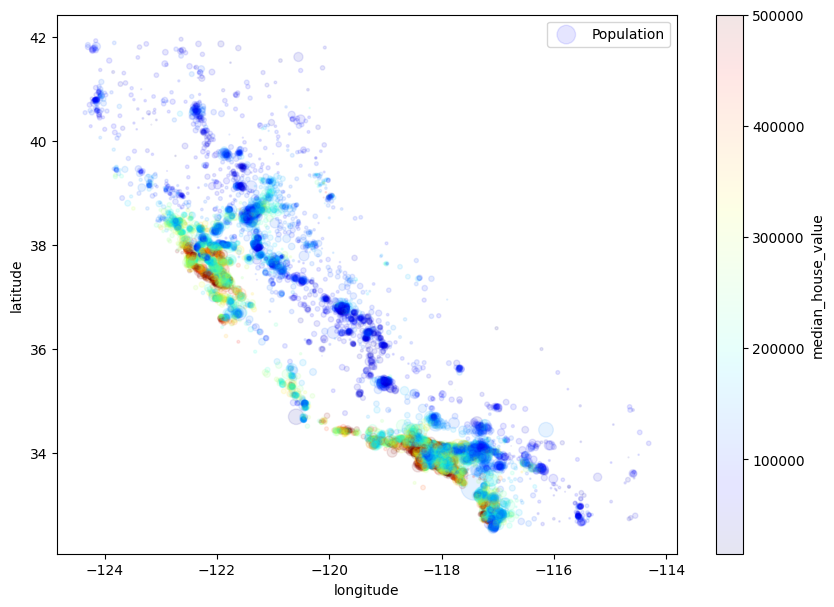

In [11]:
train_copy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,s=train_copy['population']/100,
                label="Population",figsize=(10,7),c='median_house_value',
                cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [12]:
corr_matrix=train_copy.corr()
corr_matrix.iloc[:,8].sort_values(ascending=False).to_frame()

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_10744\3808566016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train_copy.corr()


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


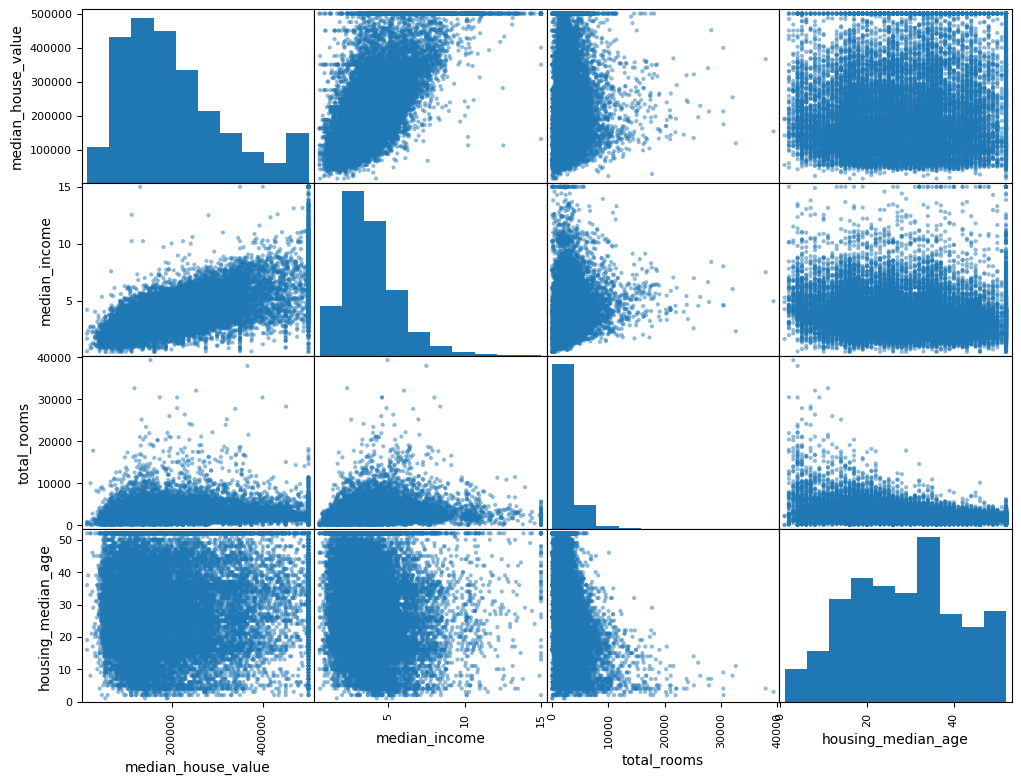

In [13]:
from pandas.plotting import scatter_matrix as sm
attributes=["median_house_value",'median_income','total_rooms','housing_median_age']
sm(df[attributes],figsize=(12,9))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

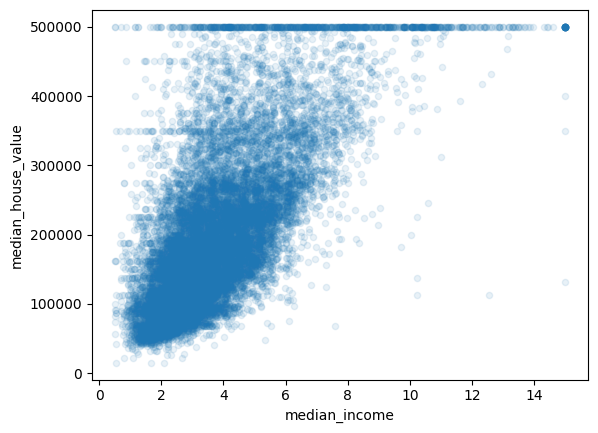

In [28]:
train_copy.plot(kind="scatter",x='median_income',y='median_house_value',alpha=0.1)

In [14]:
train_copy['bedroom_per_room']=train_copy['total_bedrooms']/train_copy['total_rooms']
train_copy['rooms_per_household']=train_copy['total_rooms']/train_copy['households']
train_copy['population_per_household']=train_copy['population']/train_copy['households']
train_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_room,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,0.205784,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,0.160714,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,0.191595,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,0.276505,3.886128,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,0.182692,6.096552,3.167241


In [30]:
corr_matrix=train_copy.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_16348\1418623796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train_copy.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedroom_per_room           -0.259952
Name: median_house_value, dtype: float64

In [15]:
h2=s_train_set.drop('median_house_value',axis=1)
hl=s_train_set['median_house_value'].copy()

In [33]:
h2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
hnum=h2.drop('ocean_proximity',axis=1)
imputer.fit(hnum)

SimpleImputer(strategy='median')

In [17]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [18]:
hnum.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [19]:
x=imputer.transform(hnum)

In [20]:
htr=pd.DataFrame(x,columns=hnum.columns)
htr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [21]:
hcat=h2[['ocean_proximity']]
hcat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
hcat_en=oe.fit_transform(hcat)
hcat_en[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [23]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [24]:
from sklearn.preprocessing import OneHotEncoder
cat_en=OneHotEncoder()
hcat_hot=cat_en.fit_transform(hcat)
hcat_hot.toarray()
cat_en.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(h2.values)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#num_pipeline=Pipeline([])

In [28]:
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('Attrb_adder',CombinedAttributesAdder()),
                       ('std_scaler',StandardScaler())
                       ])

In [29]:
hnum.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736


In [30]:
h2_num_rt=num_pipeline.fit_transform(hnum)
clms=list(hnum.columns)
for h in('rooms_per_household','population_per_household','bedrooms_per_room'):
    clms.append(h)
pdhnum=pd.DataFrame(h2_num_rt,columns=clms).head(1)
pdhnum.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-0.94135,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122


In [31]:
for c in ['ocean_proximity','1','2','3','4']:
    clms.append(c)

In [32]:
from sklearn.compose import ColumnTransformer
num_attribs=list(hnum)
cat_attribs=['ocean_proximity']
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(h2)

In [35]:
# housing_pre=pd.DataFrame(housing_prepared,columns=clms)
# housing_pre

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND


In [37]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,hl)

LinearRegression()

In [38]:
some_data=h2.iloc[:5]
some_labels=hl.iloc[:5]

In [39]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [40]:
some_data_prepared=full_pipeline.transform(some_data)
#ed=pd.DataFrame(some_data_prepared,columns=clms)

In [41]:
print("Prediction- ",lin_reg.predict(some_data_prepared))
print("Labels- ",list(some_labels))

Prediction-  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels-  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
housing_prediction=lin_reg.predict(housing_prepared,)
lin_mse=mean_squared_error(hl,housing_prediction)
r2=r2_score(hl,housing_prediction)
lin_rmse=np.sqrt(lin_mse)  
print(lin_rmse,r2)

68627.87390018745 0.6481553634454353


In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,hl)

DecisionTreeRegressor()

In [44]:
tree_reg_pred=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(hl,tree_reg_pred)
tree_rmse=np.sqrt(tree_mse)
tree_r2=r2_score(hl,tree_reg_pred)
print(tree_rmse,"",tree_r2)

0.0  1.0


In [45]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,hl,scoring='neg_mean_squared_error',cv=10)

In [46]:
tree_rmse_score=np.sqrt(-scores)

In [47]:
def display_score(scores):
    print("Score: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ",scores.std())
display_score(tree_rmse_score)

Score:  [71820.53951627 70021.26185427 69156.29986978 71716.51981135
 70349.4445866  77379.75728971 71723.66186464 73899.39021274
 69081.15151595 71266.50112156]
Mean:  71641.45276428698
Standard Deviation:  2350.2532980924284


In [48]:
lin_scores=cross_val_score(lin_reg,housing_prepared,hl,scoring='neg_mean_squared_error',cv=10)

In [49]:
lin_rmse_score=np.sqrt(-lin_scores)

In [50]:
display_score(lin_rmse_score)

Score:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180666


In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,hl)

RandomForestRegressor()

In [52]:
forest_pred=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(hl,forest_pred)
forest_rmse=np.sqrt(forest_mse)
forest_r2=r2_score(hl,forest_pred)
print("RMSE:- ",forest_rmse,"\n R2= ",forest_r2)

RMSE:-  18715.14774368547 
 R2=  0.9738340585191276


In [53]:
forest_score=cross_val_score(forest_reg,housing_prepared,hl,scoring="neg_mean_squared_error",
                             cv=10)

In [54]:
forest_rmse_score=np.sqrt(-forest_score)
display_score(forest_rmse_score)

Score:  [51760.1485021  49100.56640424 47122.23860019 52090.67271391
 47552.77698331 51743.81788137 52250.54385415 49654.63821929
 48497.04605454 53527.402991  ]
Mean:  50329.98522040979
Standard Deviation:  2106.8006615626755


In [55]:
def crossModel(reg,act,predv,scr,cvv):
    scores=cross_val_score(reg,act,predv,scoring=scr,cv=cvv)
    return np.sqrt(-scores)

In [56]:
from sklearn.svm import SVR
svm_reg=SVR(kernel='rbf')
svm_reg.fit(housing_prepared,hl)

SVR()

In [57]:
svm_pred=svm_reg.predict(housing_prepared)

In [58]:
print(np.sqrt(mean_squared_error(hl,svm_pred)))
print(r2_score(hl,svm_pred))

118578.69234925653
-0.05042042886435194


In [59]:
svm_score=cross_val_score(svm_reg,housing_prepared,hl,scoring="neg_mean_squared_error",
                             cv=10)

In [60]:
print(np.sqrt(-svm_score).mean())

118584.55594251942


In [61]:
display_score(crossModel(svm_reg,housing_prepared,hl,'neg_mean_squared_error',10))
        #(lin_reg,housing_prepared,hl,'neg_mean_squared_error',10)

Score:  [116729.13778306 120113.99351281 113925.04340616 120399.11878641
 114687.49942071 122785.64737282 119853.79338279 118280.31108193
 120230.82615529 118840.1885232 ]
Mean:  118584.55594251942
Standard Deviation:  2609.6120823493407


In [94]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg=KNeighborsRegressor(n_neighbors=20,weights='distance')
kn_reg.fit(housing_prepared,hl)
kn_pred=kn_reg.predict(housing_prepared)
kn_mse=mean_squared_error(hl,kn_pred)
kn_r2=r2_score(hl,kn_pred)
print(np.sqrt(kn_mse),kn_r2)

0.043464070228185034 0.9999999999998589


In [95]:
display_score(crossModel(kn_reg,housing_prepared,hl,'neg_mean_squared_error',10))

Score:  [63474.10389098 57945.75647964 56581.27716754 64059.8779223
 57365.71570552 62793.70380485 61553.75063013 61193.87352341
 59280.20242141 63193.95030925]
Mean:  60744.22118550325
Standard Deviation:  2611.9738502109403


In [113]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10, 30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
            ]

In [114]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [115]:
grid_search.fit(housing_prepared,hl)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [116]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [117]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [118]:
cvres=grid_search.cv_results_
for mean, params in zip(cvres["mean_test_score"],cvres['params']):
    print(np.sqrt(-mean)," ",params)

63126.734504807915   {'max_features': 2, 'n_estimators': 3}
55739.50054142976   {'max_features': 2, 'n_estimators': 10}
52766.250209714315   {'max_features': 2, 'n_estimators': 30}
60419.12827749665   {'max_features': 4, 'n_estimators': 3}
52790.111124965115   {'max_features': 4, 'n_estimators': 10}
50740.656860111085   {'max_features': 4, 'n_estimators': 30}
59556.26333092423   {'max_features': 6, 'n_estimators': 3}
51738.94416977039   {'max_features': 6, 'n_estimators': 10}
49836.842952400526   {'max_features': 6, 'n_estimators': 30}
59062.09189850495   {'max_features': 8, 'n_estimators': 3}
52420.968057443424   {'max_features': 8, 'n_estimators': 10}
50145.71910269912   {'max_features': 8, 'n_estimators': 30}
61834.376009961394   {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54025.68017419762   {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60177.948551326546   {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52144.45728983951   {'bootstrap': Fals

In [127]:
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([7.79972216e-02, 6.62502107e-02, 4.23429327e-02, 1.89424779e-02,
       1.58464905e-02, 1.83219119e-02, 1.66804267e-02, 3.24853469e-01,
       5.75803316e-02, 1.04302375e-01, 7.93243998e-02, 1.54004505e-02,
       1.53126008e-01, 5.54379396e-05, 2.88731667e-03, 6.08853939e-03])

In [148]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]
catlist=list(cat_encoder.categories_[0])
attrs=num_attribs+extra_attribs+catlist

In [150]:
sorted(zip(feature_importance,attrs),reverse=True)

[(0.324853468987322, 'median_income'),
 (0.15312600822340192, 'INLAND'),
 (0.10430237495362947, 'pop_per_hhold'),
 (0.07932439976571315, 'bedrooms_per_room'),
 (0.07799722155740364, 'longitude'),
 (0.06625021066991528, 'latitude'),
 (0.057580331640928364, 'rooms_per_hhold'),
 (0.042342932742054654, 'housing_median_age'),
 (0.01894247785353503, 'total_rooms'),
 (0.01832191189455966, 'population'),
 (0.016680426668739864, 'households'),
 (0.015846490545381755, 'total_bedrooms'),
 (0.015400450500452577, '<1H OCEAN'),
 (0.006088539385424755, 'NEAR OCEAN'),
 (0.002887316671974232, 'NEAR BAY'),
 (5.543793956380147e-05, 'ISLAND')]

In [174]:
final_model=grid_search.best_estimator_

In [176]:
x_test=s_test_set.drop('median_house_value',axis=1)
y_test=s_test_set['median_house_value'].copy()   

num_attribs=list(hnum)
cat_attribs=['ocean_proximity']
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

In [178]:
x_test_prepared=full_pipeline.transform(x_test)

In [180]:
final_prediction=final_model.predict(x_test_prepared)

In [181]:
final_mse=mean_squared_error(y_test,final_prediction)
final_mrse=np.sqrt(final_mse)
final_r2=r2_score(y_test,final_prediction)
print("Root Mean Square Error:- ",final_mrse,"\n R Squared:- ",final_r2)

Root Mean Square Error:-  47889.30671360495 
 R Squared:-  0.8240344297946691


In [186]:
from scipy import stats
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))


array([45926.86288027, 49774.43782702])

In [126]:
msr_values={'SVM':118584,'FOREST':49836,'Linear':69104,'Tree':71046,'KNN':60744}
sorted(msr_values,key=msr_values.get)

['FOREST', 'KNN', 'Linear', 'Tree', 'SVM']

In [346]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(tree_reg, housing_prepared, hl,
#                         scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)
# tree_rmse_scores

In [389]:


# test1=crossModel(lin_reg,housing_prepared,hl,'neg_mean_squared_error',10)
# display_score(test1)

Score:  [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean:  68897.63006613276
Standard Deviation:  3002.746127534865


PLAYGROUND

In [385]:
# # param_grid=[{'n_estimators':[3,10, 30],'max_features':[2,4,6,8]},
# #             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
# #             ]
# n_neighbors=20,weights='distance'

In [121]:
param_grid_knn=[{'n_neighbors':[5,3,10,20]}]

knngrid=GridSearchCV(kn_reg,param_grid_knn,
                     cv=5,scoring='neg_mean_squared_error',
                    return_train_score=True)

In [122]:
knngrid.fit(housing_prepared,hl)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=20, weights='distance'),
             param_grid=[{'n_neighbors': [5, 3, 10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [123]:
knngrid.best_estimator_

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [125]:
kcvres=knngrid.cv_results_
for i, j in zip(kcvres['mean_test_score'],kcvres['params']):
    print(np.sqrt(-i)," ",j)

61982.88015244818   {'n_neighbors': 5}
64069.47904295798   {'n_neighbors': 3}
60803.444151388176   {'n_neighbors': 10}
61048.21648726537   {'n_neighbors': 20}


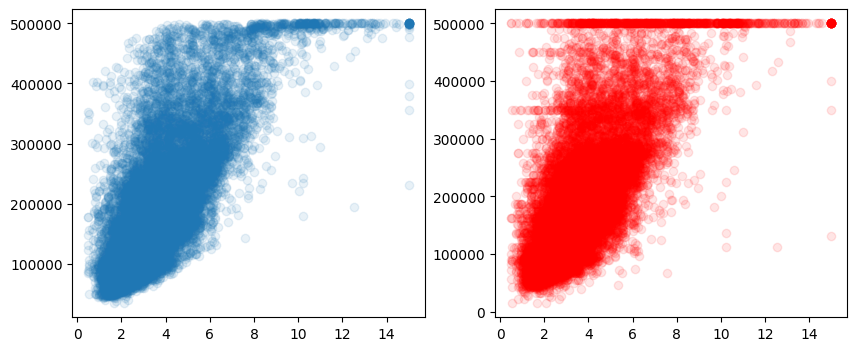

In [375]:
# plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.scatter(x=h2['median_income'],y=forest_pred,alpha=0.1)
# plt.subplot(1,2,2)
# plt.scatter(x=h2['median_income'],y=hl,color='r',alpha=0.1)

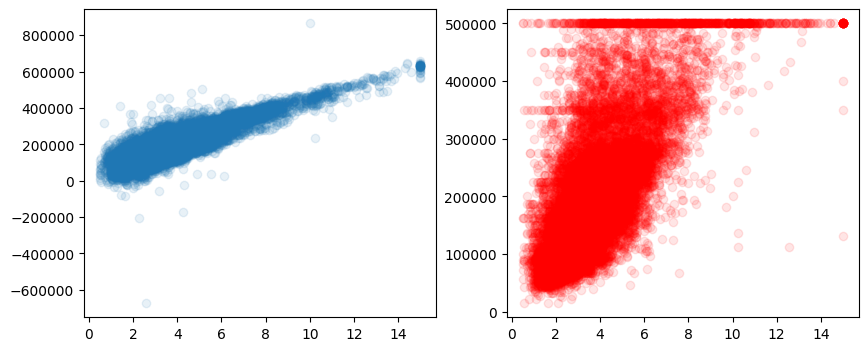

In [324]:
# plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.scatter(x=h2['median_income'],y=housing_prediction,alpha=0.1)
# plt.subplot(1,2,2)
# plt.scatter(x=h2['median_income'],y=hl,color='r',alpha=0.1)

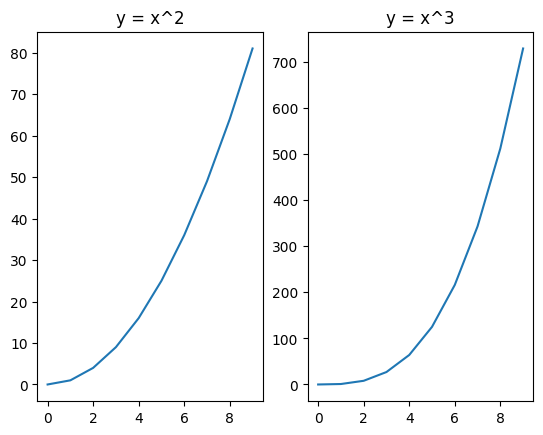

In [314]:
# import matplotlib.pyplot as plt

# # create some sample data
# x = range(10)
# y1 = [n**2 for n in x]
# y2 = [n**3 for n in x]

# # create a figure with two subplots
# plt.figure()

# # plot the first subplot
# plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
# plt.plot(x, y1)
# plt.title('y = x^2')

# # plot the second subplot
# plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
# plt.plot(x, y2)
# plt.title('y = x^3')

# # show the figure
# plt.show()

<Axes: >

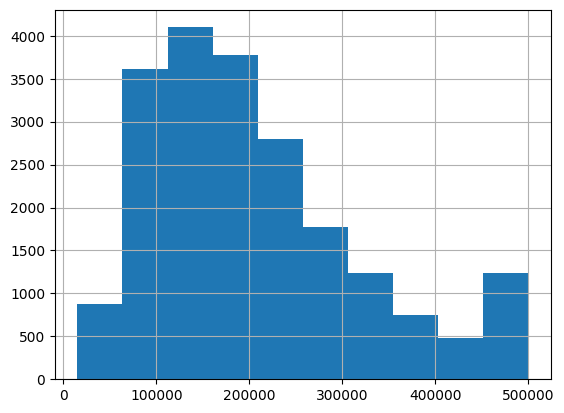

In [296]:
# df['median_house_value'].hist(bins=10)

In [285]:
# ix,ix2,ix3,ix4=3,4,5,6
# class tf(TransformerMixin,BaseEstimator):
#     def __init__(self,bedroom=True):
#         self.bedroom=bedroom
#     def fir(self,X,y=None):
#         return self
#     def tr(self,X,y=None):
#         rph=X[:,ix]/X[:,ix4]
#         #rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
#         return [X,rph]
# clt=tf(bedroom=False)
# trt=clt.tr(h2.values)
# #housing_extra_attribs
# trt

In [104]:
# from sklearn.base import TransformerMixin

# class MyTransformer(TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         # do some fitting
#         return self
    
#     def transform(self, X):
#         # do some transformation
#         X3=[]
#         for i in X:
#             #X3.append(np.where(i>1,1,0))
#             if i>0:
#                 X3.append(1)
#             else:
#                 X3.append(0)
#         return X3
# X2 = [0, 1, 2,8,9,-1,-2,-44,44]
# transformer = MyTransformer()
# X_transformed = transformer.transform(X2)
# X_transformed

In [105]:
#pipl=Pipeline([('transfoemer',MyTransformer())])

In [106]:
# yp=pipl.fit(X2)
# yp.transform(X2)